# Climate-Friendly Food Systems (CFFS) Labelling Project

### The University of British Columbia

#### Created by Silvia Huang

## Set up and Import Libraries

In [1]:
#install libraries if needed
#!pip3 install pdpipe

In [2]:
import numpy as np
import pandas as pd
import pdpipe as pdp
import matplotlib.pyplot as plt
import glob
import os
import csv
from itertools import islice
from decimal import Decimal
import xml.etree.ElementTree as et
from xml.etree.ElementTree import parse
import openpyxl
import pytest

In [3]:
#set the root path, change the directory into the project folder
os.chdir("/Users/silvia/cffs-label")

In [4]:
#enable reading data in the scrolling window 
pd.set_option("display.max_rows", None, "display.max_columns", None)

## Import Cleaned Datasets

In [5]:
Items = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Items_List.csv"))
Items.dtypes

ItemId             object
Description        object
CaseQty           float64
CaseUOM            object
PakQty            float64
PakUOM             object
InventoryGroup     object
dtype: object

In [6]:
Items.head()

,ItemId,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup
0,I-4472,AVOCADO MX,20.0,CT,1.00,CT,PRODUCE
1,I-27410,BACON 3MM NATURALLY SMKD,5.0,Kg,1.00,Kg,MEAT
2,I-17203,BALSAMIC GLAZE,2.0,bottle,2.00,L,FOOD - GROCERY
3,I-3619,BAY LEAF WHL SHAKER TFC,8.0,each,84.00,g,SPICES
4,I-3149,BEANS TURTLE BLACK,6.0,LG CAN,2.84,L,FOOD - GROCERY


In [7]:
Ingredients = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Ingredients_List.csv"))
Ingredients.dtypes

IngredientId     object
Qty             float64
Uom              object
Conversion      float64
InvFactor       float64
Recipe           object
dtype: object

In [8]:
Ingredients.head()

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,I-11842,2.0,LOAF,1.000,0.8818,P-13648
1,I-3388,60.0,ml,0.001,26.4550,P-13648
2,I-3642,5.0,g,1.000,2.2046,P-13648
3,I-6006,60.0,ml,0.001,26.4550,P-13648
4,I-6026,5.0,g,1.000,2.2046,P-13648


In [9]:
Preps = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_List_Cleaned.csv"))
Preps.dtypes

PrepId             object
Description        object
PakQty            float64
PakUOM             object
InventoryGroup     object
StdQty            float64
StdUom             object
dtype: object

In [10]:
Preps.head()
Preps.shape

(43, 7)

In [11]:
Products = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Products_List.csv"))
Products.dtypes

ProdId         object
Description    object
SalesGroup     object
dtype: object

In [12]:
Products.head()

,ProdId,Description,SalesGroup
0,R-58265,DIM SUM|Chicken Gyoza (3),OK - DIM SUM
1,R-63876,DIMSUM|Shrimp & Pork Wonton,OK - DIM SUM
2,R-22618,GRL|Add Cheese|1 slice,FT GRILL DAY
3,R-28293,GRL|Crispy Chicken Strips,OK - GRILL KITCHEN DAY
4,R-35015,GRL|French Fries,OK - GRILL KITCHEN DAY


In [13]:
Conversions = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Conversions_List.csv"))
Conversions.dtypes

ConversionId       object
Multiplier        float64
ConvertFromQty    float64
ConvertFromUom     object
ConvertToQty      float64
ConvertToUom       object
dtype: object

In [14]:
Conversions

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,NaN,1.000000,1.0000,XXX,1.0000,L
1,NaN,0.877193,1.0000,1.14L,1.1400,L
2,NaN,0.666667,1.0000,1.5L,1.5000,L
3,NaN,0.571429,1.0000,1.75 L,1.7500,L
4,NaN,0.500000,1.0000,2L,2.0000,L
5,NaN,0.250000,1.0000,4L,4.0000,L
6,NaN,0.083333,1.0000,FOOT,12.0000,INCH
7,NaN,0.062500,1.0000,16L,16.0000,L
8,NaN,0.059172,1.0000,1/2LTR,16.9000,fl oz
9,NaN,0.039370,1.0000,750ML,25.4000,fl oz


In [15]:
mapping = pd.read_csv(os.path.join(os.getcwd(), "data", "mapping", "Mapping.csv"))
mapping.dtypes

ItemId                                                     object
CategoryID                                                  int64
Description                                                object
CaseQty                                                   float64
CaseUOM                                                    object
PakQty                                                    float64
PakUOM                                                     object
InventoryGroup                                             object
Active Total Supply Chain Emissions (kg CO2 / kg food)    float64
g N lost/kg product                                       float64
Freshwater Withdrawals (L/FU)                             float64
Stress-Weighted Water Use (L/FU)                          float64
dtype: object

In [16]:
mapping

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
0,I-57545,1,CHUCK FLAT BONELESS FZN,3.300,Kg,1.000,Kg,MEAT,41.346300,329.500,1677.200,61309.0000
1,I-10869,1,BEEF STIRFRY COV FR,5.000,Kg,1.000,Kg,MEAT,41.346300,329.500,1677.200,61309.0000
2,I-7064,1,BEEF OUTSIDE FLAT AAA,1.000,Kg,1.000,Kg,MEAT,41.346300,329.500,1677.200,61309.0000
3,I-37005,1,BEEF MEATBALLS,4.540,Kg,1000.000,g,MEAT,41.346300,329.500,1677.200,61309.0000
4,I-37002,1,BEEF INSIDE ROUND SHAVED,9.000,Kg,1000.000,g,MEAT,41.346300,329.500,1677.200,61309.0000
5,I-3876,1,BEEF CHUCK GROUND AAA,1.000,Kg,1.000,Kg,MEAT,41.346300,329.500,1677.200,61309.0000
6,I-34065,1,BEEF BONES KNUCKLE FZ,1.000,Kg,1.000,Kg,MEAT,41.346300,329.500,1677.200,61309.0000
7,I-11661,1,"BEEF STEW 3/4"" FROZEN",5.000,Kg,1.000,Kg,MEAT,41.346300,329.500,1677.200,61309.0000
8,I-3837,1,"BEEF STEW DICED 3/4""FR",1.000,Kg,1.000,Kg,MEAT,41.346300,329.500,1677.200,61309.0000
9,I-43648,1,BRISKET BEEF CORN SMKD FR,4.500,Kg,1.000,Kg,MEAT,41.346300,329.500,1677.200,61309.0000


### Unit Converter

In [17]:
#import standard unit conversion information for items
Std_Unit = pd.read_csv(os.path.join(os.getcwd(), "data", "external", "standard_conversions.csv"))
Std_Unit.head()

,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,4.92890,1,tsp,4.92890,ml
1,14.78700,1,Tbsp,14.78700,ml
2,946.35000,1,qt,946.35000,ml
3,473.17625,1,pt,473.17625,ml
4,28.34950,1,oz,28.34950,g


In [18]:
#import list of prep that need convert uom to standard uom manually
Manual_PrepU = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_UpdateUom.csv"))
Manual_PrepU.head()

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom
0,P-54697,LEMON|Wedge 1/8,8.0,each,PREP,84.0,g
1,P-35132,MARINATED|Lemon & Herb Chx,185.0,ea,PREP,24050.0,g
2,P-51992,YIELD|Bread|Sourdough 5/8,36.0,slice,NaN,1620.0,g
3,P-26234,BATCH|Roasted Garlic Bread,16.0,ea,PREP,1280.0,g
4,P-26170,GRILLED|NaanBread,1.0,ea,PREP,125.0,g


In [19]:
#Add unit conversion info for preps into converter
Prep_cov = Manual_PrepU[['PrepId', 'PakQty','PakUOM','StdQty','StdUom']]
Prep_cov.insert(1, "Multiplier", '')
Prep_cov.columns = Conversions.columns
Prep_cov['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']
Prep_cov.head()

<ipython-input-19-a7a03a0b3fff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Prep_cov['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']


,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,P-54697,0.095238,8.0,each,84.0,g
1,P-35132,0.007692,185.0,ea,24050.0,g
2,P-51992,0.022222,36.0,slice,1620.0,g
3,P-26234,0.012500,16.0,ea,1280.0,g
4,P-26170,0.008000,1.0,ea,125.0,g


In [20]:
frames = [Conversions, Prep_cov]
Conversions = pd.concat(frames).reset_index(drop=True, inplace=False).drop_duplicates()
Conversions

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,NaN,1.000000,1.0000,XXX,1.0000,L
1,NaN,0.877193,1.0000,1.14L,1.1400,L
2,NaN,0.666667,1.0000,1.5L,1.5000,L
3,NaN,0.571429,1.0000,1.75 L,1.7500,L
4,NaN,0.500000,1.0000,2L,2.0000,L
5,NaN,0.250000,1.0000,4L,4.0000,L
6,NaN,0.083333,1.0000,FOOT,12.0000,INCH
7,NaN,0.062500,1.0000,16L,16.0000,L
8,NaN,0.059172,1.0000,1/2LTR,16.9000,fl oz
9,NaN,0.039370,1.0000,750ML,25.4000,fl oz


In [21]:
#seperate uoms that converted to 'ml' or 'g'
liquid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'ml', 'ConvertFromUom'].tolist()
solid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'g', 'ConvertFromUom'].tolist()

In [22]:
#construct a standard unit converter
def std_converter(qty, uom):
    if uom in Std_Unit['ConvertFromUom'].tolist():
        multiplier = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'Multiplier']
        Qty = float(qty)*float(multiplier)
        Uom = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'ConvertToUom'].values[0]
    else:
        Qty = qty
        Uom = uom
    return (Qty, Uom)

In [23]:
#test the std_converter
#std_converter(0.25,'lb')

In [24]:
#construct a unit converter for specific items
spc_cov = list(filter(None, Conversions['ConversionId'].tolist()))

def spc_converter(ingre, qty, uom):
    if uom in liquid_unit + solid_unit: #convert to std uom for ingredients has no specific convention instruction
        return std_converter(qty, uom)
    elif ingre in spc_cov: #convert to std uom for ingredients has specific convention instruction
        conversion = Conversions.loc[(Conversions['ConversionId'] == ingre) & (Conversions['ConvertFromUom'] == uom)
                                    & (Conversions['ConvertToUom'] == 'g')]
        conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
        multiplier = conversion['Multiplier']
        if multiplier.empty:
            return std_converter(qty, uom)
        else: 
            print(conversion)
            Qty = float(qty)/float(multiplier)
            Uom = conversion['ConvertToUom'].values[0]
            return (Qty, Uom)
    else:
        return std_converter(qty, uom)

In [25]:
#test the spc_converter
#spc_converter('I-1120', 1, 'CT')

In [26]:
#spc_converter('P-35132', 1, 'ea')

## GHG Factors Calculation for Preps

In [27]:
Preps['GHG Emission (g)'] = 0
Preps['GHG Emission(g)/StdUom'] = 0
Preps['N lost (g)'] = 0
Preps['N lost (g)/StdUom'] = 0
Preps['Freshwater Withdrawals (ml)'] = 0
Preps['Freshwater Withdrawals (ml)/StdUom'] = 0
Preps['Stress-Weighted Water Use (ml)'] = 0
Preps['Stress-Weighted Water Use (ml)/StdUom'] = 0

In [28]:
#calculate GHG, nitro, water footprints per gram/ml of each prep for items as ingredients only
def get_items_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('I'): 
            ghge = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)']
            nitro_fac = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product']
            water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)']
            str_water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)']
            #print(ghge)
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
            #print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
            print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)

In [29]:
#calculate GHG, nitro, water footprints per gram/ml of each prep for other preps as ingredients
def get_preps_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P') and len(ingres) > 1:
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            #print(ghge)
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
            #print(ingre, Qty, Uom, qty, qty*float(ghge))
            print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)

In [30]:
#calculate GHG, nitro, water footprints per gram/ml of each prep for linked preps
def link_preps(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    if len(ingres) == 1:
        ingre = ingres.iloc[0]['IngredientId']
        if ingre.startswith('P'):
            #print(ingres)
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            Qty = float(ingres.iloc[0]['Qty'])
            Uom = ingres.iloc[0]['Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg = qty*float(ghge)
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg = qty*float(ghge)
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
            #print(ingre, ghge, Qty, Uom, qty, weight)
            #print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)

In [31]:
for index, row in Preps.iterrows():
    get_items_ghge_prep(index , row)

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)


Index: 0 
Ingres:
    IngredientId   Qty Uom  Conversion  InvFactor   Recipe
14       I-2159  50.0  CT         1.0       1.00  P-26047
15       I-5983   2.0   L         1.0       0.04  P-26047
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
105       I-2159        0.02             1.0             CT          50.0   

    ConvertToUom  
105            g  
9153.75 153.0 1582250.0 46552500.0
9153.75 153.0 1584250.0 46554500.0
Index: 1 
Ingres:
    IngredientId    Qty Uom  Conversion  InvFactor   Recipe
87       I-3619    6.0   g    1.000000     0.6667  P-58362
88       I-3660  400.0   g    0.001000    44.4444  P-58362
89      I-42230  100.0   g    1.000000    11.1111  P-58362
90       I-4657  300.0   g    0.002205    33.3333  P-58362
91       I-4709  375.0   g    0.011905    41.6667  P-58362
92       I-4745  750.0   g    0.002205    83.3333  P-58362
93       I-5983   12.0   L    1.000000     1.3333  P-58362
94       I-6026  675.0   g    1.000000    75.0000  P-

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

 6.75 24900.0 220300.0
11570.300000000001 6.75 24900.0 220300.0
Index: 19 
Ingres:
   IngredientId     Qty Uom  Conversion  InvFactor   Recipe
7       I-3643   225.0   g       0.001     0.1837  P-18907
8       I-6026  1000.0   g       1.000     0.8163  P-18907
2108.3175 1.51875 5602.5 49567.5
2548.3175 1.51875 5602.5 49567.5
Index: 20 
Ingres:
    IngredientId  Qty Uom  Conversion  InvFactor   Recipe
35      P-58362  1.0  Kg         1.0        1.0  P-28759
Index: 21 
Ingres:
   IngredientId   Qty   Uom  Conversion  InvFactor   Recipe
0      I-11842   2.0  LOAF       1.000     0.8818  P-13648
1       I-3388  60.0    ml       0.001    26.4550  P-13648
2       I-3642   5.0     g       1.000     2.2046  P-13648
3       I-6006  60.0    ml       0.001    26.4550  P-13648
4       I-6026   5.0     g       1.000     2.2046  P-13648
   ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
92      I-11842    0.002203             1.0           LOAF         454.0   

   ConvertTo

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

In [32]:
for index, row in Preps.iterrows():
    link_preps(index, row)

In [33]:
for index, row in Preps.iterrows():
    get_preps_ghge_prep(index, row)

Index: 0 
Ingres:
    IngredientId   Qty Uom  Conversion  InvFactor   Recipe
14       I-2159  50.0  CT         1.0       1.00  P-26047
15       I-5983   2.0   L         1.0       0.04  P-26047
Index: 1 
Ingres:
    IngredientId    Qty Uom  Conversion  InvFactor   Recipe
87       I-3619    6.0   g    1.000000     0.6667  P-58362
88       I-3660  400.0   g    0.001000    44.4444  P-58362
89      I-42230  100.0   g    1.000000    11.1111  P-58362
90       I-4657  300.0   g    0.002205    33.3333  P-58362
91       I-4709  375.0   g    0.011905    41.6667  P-58362
92       I-4745  750.0   g    0.002205    83.3333  P-58362
93       I-5983   12.0   L    1.000000     1.3333  P-58362
94       I-6026  675.0   g    1.000000    75.0000  P-58362
95       I-7065   10.0  Kg    1.000000     1.1111  P-58362
96      P-44901   15.0   g    0.001000     1.6667  P-58362
97      P-50676   20.0   g    0.001000     2.2222  P-58362
46418.81718461539 1178.2053076923075 3739575.553846154 4028678.9153846153
46434.

86       I-6777  1.0  CT         1.0     0.0016  P-57092
Index: 34 
Ingres:
    IngredientId   Qty Uom  Conversion  InvFactor   Recipe
85       I-4787  4.54  Kg     2.20462      1.135  P-56811
Index: 35 
Ingres:
   IngredientId   Qty Uom  Conversion  InvFactor   Recipe
9       I-4698  10.0  Kg         4.0     1.3514  P-20239
Index: 36 
Ingres:
    IngredientId   Qty Uom  Conversion  InvFactor   Recipe
53       I-2603   1.0  Kg     2.20462     0.0013  P-45231
54      I-51440  40.0   g     1.00000     0.0500  P-45231
55       I-6026   1.0   g     1.00000     0.0013  P-45231
Index: 37 
Ingres:
     IngredientId   Qty    Uom  Conversion  InvFactor  Recipe
101       I-4826  48.0  BUNCH         1.0     2.5196  P-9854
Index: 38 
Ingres:
   IngredientId   Qty Uom  Conversion  InvFactor   Recipe
6       I-4793  10.0  Kg     2.20462     1.2048  P-18746
Index: 39 
Ingres:
   IngredientId   Qty Uom  Conversion  InvFactor   Recipe
5       I-3451  2.56   L         1.0       1.28  P-13933
Index: 40 


In [34]:
Preps

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom
0,P-26047,BOILED|Hard Boiled Eggs FT,50.000,ea,PREP,2500.0,g,9153.750000,3.661500,153.000000,0.061200,1.584250e+06,633.700000,4.655450e+07,18621.800000
1,P-58362,BRINED|Turkey|Breast,9.000,Kg,PREP,9000.0,g,46434.038291,5.159338,1178.444414,0.130938,3.742036e+06,415.781804,4.117648e+06,457.516420
2,P-34084,COOKED|Bacon,20.000,g,PREP,20.0,g,560.395500,28.019775,7.569600,0.378480,1.031871e+05,5159.355000,3.091834e+06,154591.695000
3,P-55141,COOKED|Charred Corn,2.000,Kg,NaN,2000.0,g,3083.283888,1.541642,17.836097,0.008918,9.027360e+04,45.136801,7.413619e+05,370.680974
4,P-48870,COOKED|Chicken Stirfry,6.300,Kg,NaN,6300.0,g,44486.515000,7.061352,1168.337500,0.185450,3.704245e+06,587.975397,3.346015e+06,531.113492
5,P-51134,COOKED|Hard Boiled Egg,2.000,un,NaN,100.0,g,366.150000,3.661500,6.120000,0.061200,6.329000e+04,632.900000,1.862100e+06,18621.000000
6,P-46546,CRUMBLED|Feta,2.900,Kg,NaN,2900.0,g,26731.200000,9.217655,279.900000,0.096517,4.677900e+06,1613.068966,2.413893e+08,83237.689655
7,P-43962,"DICED|Cucumber|1/4""",3.300,Kg,PREP,3300.0,g,1911.019236,0.579097,30.019988,0.009097,3.089399e+05,93.618144,1.117010e+07,3384.877434
8,P-38554,"DICED|Cucumber|3/4""",3.300,Kg,PREP,3300.0,g,1911.019236,0.579097,30.019988,0.009097,3.089399e+05,93.618144,1.117010e+07,3384.877434
9,P-9765,"DICED|Red Pepper|1/4""",1.000,Kg,NaN,1000.0,g,605.903614,0.605904,9.518072,0.009518,9.795181e+04,97.951807,3.541566e+06,3541.566265


In [35]:
path = os.path.join(os.getcwd(), "data", "final", "Preps Footprints.csv")
Preps.to_csv(path, index = False, header = True)

## GHGe Calculation for Products

In [36]:
Products['Weight (g)'] = 0
Products['GHG Emission (g)'] = 0
Products['N lost (g)'] = 0
Products['Freshwater Withdrawals (ml)'] = 0
Products['Stress-Weighted Water Use (ml)'] = 0

In [37]:
#calculate GHG, nitro, water footprints per gram/ml of each product for items ingredients only
def get_items_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('I'):
            ghge = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)']
            nitro_fac = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product']
            water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)']
            str_water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)']
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
            print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)

In [38]:
#calculate GHG, nitro, water footprints per gram/ml of each product for preps ingredients only
def get_preps_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P'):
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
            print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)

In [39]:
#calculate GHG, nitro, water footprints per gram/ml of each product for other products ingredients
def get_products_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('R'):
            ghge = Products.loc[Products['ProdId'] == ingre, 'GHG Emission (g)']
            nitro_fac = Products.loc[Products['ProdId'] == ingre, 'N lost (g)']
            water_fac = Products.loc[Products['ProdId'] == ingre, 'Freshwater Withdrawals (ml)']
            str_water_fac = Products.loc[Products['ProdId'] == ingre, 'Stress-Weighted Water Use (ml)']
            Weight = Products.loc[Products['ProdId'] == ingre, 'Weight (g)']
            Qty = float(ingres.loc[idx,'Qty'])
            ghg += Qty*float(ghge)
            nitro += Qty*float(nitro_fac)
            water += Qty*float(water_fac)
            str_water += Qty*float(str_water_fac)
            weight += Qty*float(Weight)
            print(ingre, Qty, float(ghge), Qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)

In [40]:
for index, row in Products.iterrows():
    get_items_ghge(index , row)

Index: 0 
Ingres:
     IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
177      I-10882  0.66  fl oz      0.0284        1.0  R-58265
178      I-29665  3.00   each      1.0000        1.0  R-58265
179      I-47774  0.66  fl oz      0.0284        1.0  R-58265
180       I-9379  0.66  fl oz      0.0284        1.0  R-58265
I-10882 0.66 fl oz 19.51851 0.0 0.0
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
309      I-29665       0.025             1.0           each          40.0   

    ConvertToUom  
309            g  
I-29665 3.0 each 120.0 1.986875 238.42499999999998
I-47774 0.66 fl oz 19.51851 0.0 0.0
I-9379 0.66 fl oz 19.51851 0.0 0.0
Index: 1 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
202      I-32263  3.0  ea         1.0        1.0  R-63876
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
310      I-32263    0.033333             1.0             ea          30.0   

    ConvertToUom  
310        

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

In [41]:
for index, row in Products.iterrows():
    get_preps_ghge(index, row)

Index: 0 
Ingres:
     IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
177      I-10882  0.66  fl oz      0.0284        1.0  R-58265
178      I-29665  3.00   each      1.0000        1.0  R-58265
179      I-47774  0.66  fl oz      0.0284        1.0  R-58265
180       I-9379  0.66  fl oz      0.0284        1.0  R-58265
Index: 1 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
202      I-32263  3.0  ea         1.0        1.0  R-63876
Index: 2 
Ingres:
     IngredientId  Qty    Uom  Conversion  InvFactor   Recipe
102      I-14181  1.0  slice         1.0        1.0  R-22618
Index: 3 
Ingres:
     IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
103       I-3371  15.0     ml       0.001        1.0  R-28293
104       I-3557  15.0     ml       0.001        1.0  R-28293
105       I-3560  15.0     ml       0.001        1.0  R-28293
106      I-54207  15.0     ml       0.001        1.0  R-28293
107      P-45255   4.5  piece       1.000        1.0  R-28293
    

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)


 10.0 g 10.0 0.626864731510157 6.268647315101569
Index: 7 
Ingres:
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
108      I-13226  85.00   g    0.002205        1.0  R-34864
109      I-17159  30.00   g    0.002205        1.0  R-34864
110       I-4472   0.25  CT    1.000000        1.0  R-34864
111       I-7953  30.00   g    0.001000        1.0  R-34864
112      P-26047   0.50  ea    1.000000        1.0  R-34864
113      P-26050  30.00  ml    0.001000        1.0  R-34864
114      P-28759  50.00   g    0.001000        1.0  R-34864
115      P-34084  15.00   g    1.000000        1.0  R-34864
116      P-42425  20.00   g    1.000000        1.0  R-34864
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
150      P-26047        0.02            50.0             ea        2500.0   

    ConvertToUom  
150            g  
P-26047 0.5 ea 25.0 3.6615 91.53750000000001
P-26050 30.0 ml 30.0 3.9284023398979597 117.8520701969388
P-28759 50.0 g 50.0 5.15635686666666

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

In [42]:
for index, row in Products.iterrows():
    get_products_ghge(index, row)

Index: 0 
Ingres:
     IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
177      I-10882  0.66  fl oz      0.0284        1.0  R-58265
178      I-29665  3.00   each      1.0000        1.0  R-58265
179      I-47774  0.66  fl oz      0.0284        1.0  R-58265
180       I-9379  0.66  fl oz      0.0284        1.0  R-58265
Index: 1 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
202      I-32263  3.0  ea         1.0        1.0  R-63876
Index: 2 
Ingres:
     IngredientId  Qty    Uom  Conversion  InvFactor   Recipe
102      I-14181  1.0  slice         1.0        1.0  R-22618
Index: 3 
Ingres:
     IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
103       I-3371  15.0     ml       0.001        1.0  R-28293
104       I-3557  15.0     ml       0.001        1.0  R-28293
105       I-3560  15.0     ml       0.001        1.0  R-28293
106      I-54207  15.0     ml       0.001        1.0  R-28293
107      P-45255   4.5  piece       1.000        1.0  R-28293
Inde

In [43]:
#filter out products using preps with unknown units
Preps_Nonstd = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_NonstdUom.csv"))
Preps_Nonstd

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom


In [44]:
def filter_products(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    #print(ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre in Preps_Nonstd['PrepId'].tolist():
            print(ingre, index, Products.loc[index,'ProdId'])
            Products.drop(index, inplace=True)
            break

In [45]:
for index, row in Products.iterrows():
    filter_products(index, row)

In [46]:
Products['GHG Emission (g) / 100g'] = round(100*Products['GHG Emission (g)']/Products['Weight (g)'], 3)
Products['N lost (g) / 100g'] = round(100*Products['N lost (g)']/Products['Weight (g)'], 3)
Products['Freshwater Withdrawals (ml) / 100g'] = round(100*Products['Freshwater Withdrawals (ml)']/Products['Weight (g)'], 3)
Products['Stress-Weighted Water Use (ml) / 100g'] = round(100*Products['Stress-Weighted Water Use (ml)']/Products['Weight (g)'], 3)

In [47]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (ml) / 100g,Stress-Weighted Water Use (ml) / 100g
0,R-58265,DIM SUM|Chicken Gyoza (3),OK - DIM SUM,178.555530,238.425000,5.024250,39884.285594,9.339481e+05,133.530,2.814,22337.189,523057.524
1,R-63876,DIMSUM|Shrimp & Pork Wonton,OK - DIM SUM,90.000001,765.087758,5.235750,86771.250868,2.894033e+06,850.098,5.818,96412.500,3215592.500
2,R-22618,GRL|Add Cheese|1 slice,FT GRILL DAY,14.000000,124.745602,1.306200,21830.200437,1.126483e+06,891.040,9.330,155930.000,8046310.000
3,R-28293,GRL|Crispy Chicken Strips,OK - GRILL KITCHEN DAY,352.500007,1244.758145,30.446486,98863.502441,3.316106e+05,353.123,8.637,28046.383,94073.918
4,R-35015,GRL|French Fries,OK - GRILL KITCHEN DAY,230.000000,150.499350,1.439800,1523.750000,7.929503e+04,65.435,0.626,662.500,34476.100
5,R-54875,GRL|Poutine|Original,OK - GRILL KITCHEN DAY,400.000000,863.331350,8.968552,126546.473118,6.527315e+06,215.833,2.242,31636.618,1631828.751
6,R-55142,GRL|Salad|Baja,OK - GRILL KITCHEN DAY,390.000000,945.493301,6.749836,150966.104761,6.988963e+06,242.434,1.731,38709.258,1792041.697
7,R-34864,GRL|Salad|Chef,OK - GRILL KITCHEN DAY,319.000005,1243.484941,18.434707,176686.571636,6.169158e+06,389.807,5.779,55387.639,1933905.192
8,R-60537,GRL|Salad|Chef's Side,OK - GRILL KITCHEN DAY,151.000005,290.970737,3.446917,39389.224994,1.743186e+06,192.696,2.283,26085.579,1154427.724
9,R-50574,GRL|Salad|Cobb,OK - GRILL BRUNCH,335.000000,1380.917808,23.123203,185468.729029,5.351048e+06,412.214,6.902,55363.800,1597327.748


In [48]:
Products.shape

(18, 12)

In [49]:
path = os.path.join(os.getcwd(), "data", "final", "Recipes Footprints.csv")
Products.to_csv(path, index = False, header = True)

<AxesSubplot:>

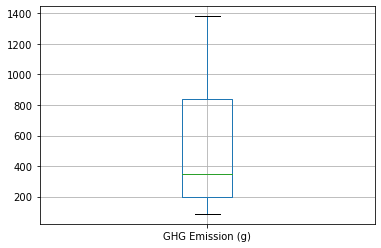

In [50]:
Products.boxplot(column=['GHG Emission (g)'], return_type='axes')

<AxesSubplot:>

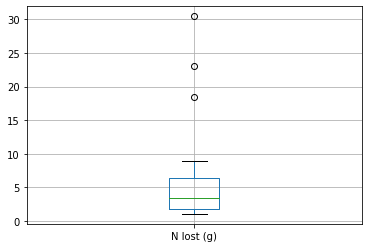

In [51]:
Products.boxplot(column=['N lost (g)'], return_type='axes')

<AxesSubplot:>

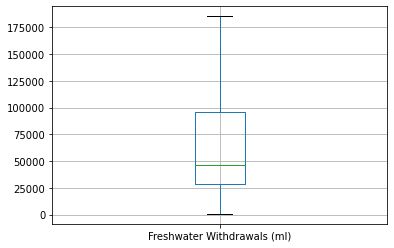

In [52]:
Products.boxplot(column=['Freshwater Withdrawals (ml)'], return_type='axes')

<AxesSubplot:>

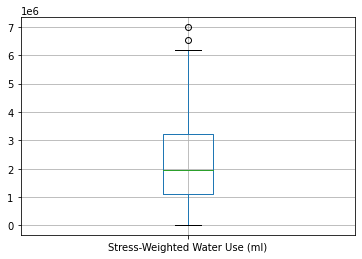

In [53]:
Products.boxplot(column=['Stress-Weighted Water Use (ml)'], return_type='axes')

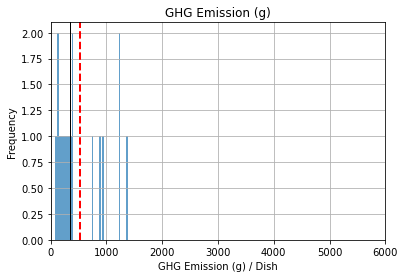

In [54]:
Products.hist(column=['GHG Emission (g)'], bins= 40, alpha = 0.7)
plt.axvline(Products['GHG Emission (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['GHG Emission (g)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('GHG Emission (g) / Dish')
plt.ylabel('Frequency')
plt.xlim([0, 6000])
plt.savefig('GHGe_dish.png')

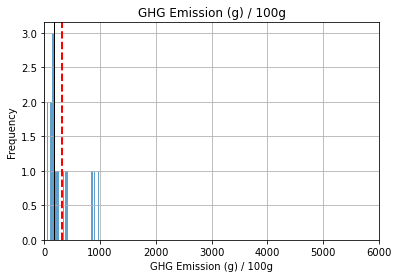

In [55]:
Products.hist(column=['GHG Emission (g) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['GHG Emission (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['GHG Emission (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('GHG Emission (g) / 100g')
plt.ylabel('Frequency')
plt.xlim([0, 6000])
plt.savefig('GHGe_100g.png')

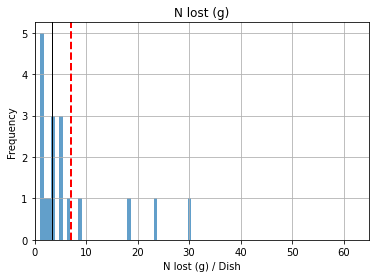

In [56]:
Products.hist(column=['N lost (g)'], bins= 40, alpha = 0.7)
plt.axvline(Products['N lost (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['N lost (g)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('N lost (g) / Dish')
plt.ylabel('Frequency')
plt.xlim([0, 65])
plt.savefig('N lost_dish.png')

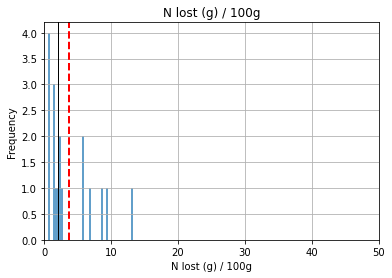

In [57]:
Products.hist(column=['N lost (g) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['N lost (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['N lost (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('N lost (g) / 100g')
plt.ylabel('Frequency')
plt.xlim([0, 50])
plt.savefig('N lost_100g.png')